# AVACADO PROJECT

In [1]:
# Importing all the requaired libraries.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_recall_curve,roc_curve
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import cross_val_score
import joblib
import warnings
warnings.filterwarnings('ignore')

# Examining the data

In [2]:
# Reading the csv file.
df = pd.read_csv('avocado 2.csv')
df.head() 

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
# Seeing dataset shape
df.shape 

(18249, 14)

* Dataset contains 18249 rows and 14 columns

In [4]:
# Droping the columns
df = df.drop(['Unnamed: 0'],axis=1) 

* Droping "Unnamed:0" column whcih is not required   to analys.
  Dummy column.

In [5]:
#Dataset head
df.head() 

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [6]:
#Information about dataset
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


* Dataset contains float64(9), int64(1), object(3)   values.
* we can see there are no NULL values

In [7]:
#Dataset shape
df.shape

(18249, 13)

* Dataset contains 18249 rows and 13 columns now

In [8]:
#Dataset columns
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

* There are 13 columns 

In [9]:
# data types
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [10]:
# checking null values.
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

* There are no NAN, NULL values.

# Summary Statistics

In [11]:
# Describeing the dataset
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


1. There are no missing values.

2. The mean is more than 50% median in some of the    colums, so we can say there are outliers.

2. There ia a large difference in 75% and max.

3. The first and second abservation suggest that      there are extreme outliers present in these        columns.

In [12]:
# cheking record.
df.year.unique()

array([2015, 2016, 2017, 2018])

In [13]:
#checking record.
df.year.value_counts()

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64

* There are 4 years records.

In [14]:
# checking region.
df.region.unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

* There are many region.

# Data Visualization

<AxesSubplot:xlabel='Date', ylabel='count'>

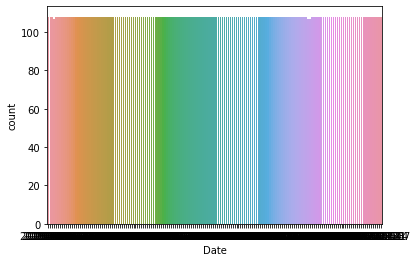

In [15]:
sns.countplot(df['Date']) 

* Here data is distributed normally.

<AxesSubplot:xlabel='AveragePrice', ylabel='count'>

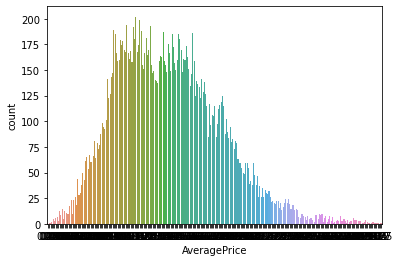

In [16]:
sns.countplot(df['AveragePrice'])

* Here data is not distributed nornmally in the columns.

<AxesSubplot:xlabel='Total Volume', ylabel='count'>

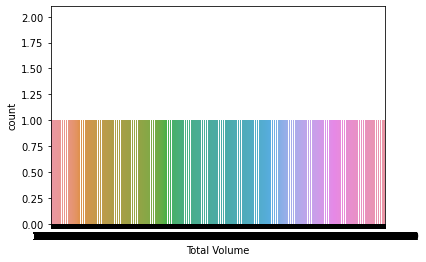

In [17]:
sns.countplot(df['Total Volume'])

* Here data is distributed normally

<AxesSubplot:xlabel='4046', ylabel='count'>

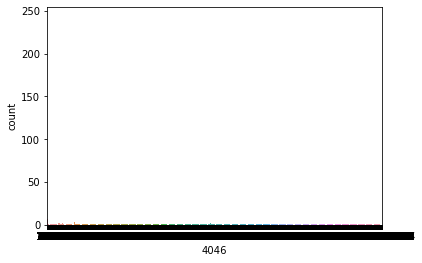

In [18]:
sns.countplot(df['4046']) 

* Here data is not distributed normally.

<AxesSubplot:xlabel='type', ylabel='count'>

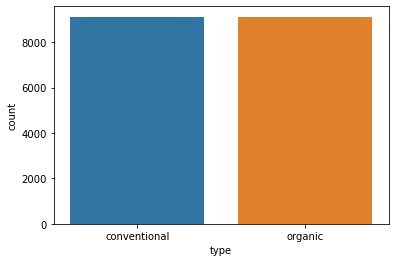

In [19]:
sns.countplot(df['type']) 

* Here data is distributed normally.

<AxesSubplot:>

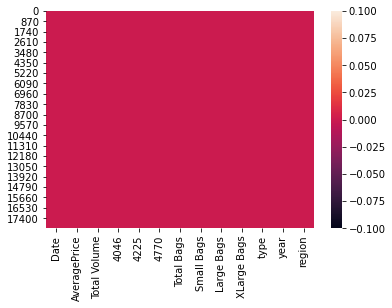

In [20]:
sns.heatmap(df.isnull())

* Here in heatmap we can say there no NULL values   in the dataset.

In [21]:
dfcor=df.corr()
dfcor

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033
year,0.093197,0.017193,0.003353,-0.009559,-0.036531,0.071552,0.063915,0.087891,0.081033,1.000000


<AxesSubplot:>

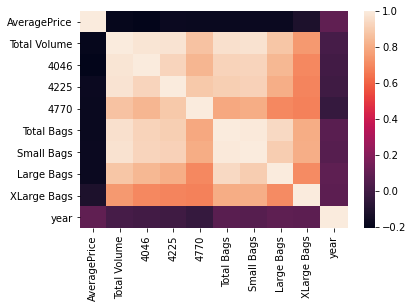

In [22]:
sns.heatmap(dfcor)

* Heatmap containes the difference of corresponding values of the Dataset.

<AxesSubplot:>

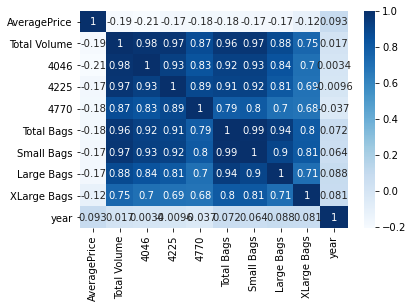

In [23]:
# ploting sns map
plt.figure(figsize=(6,4))
sns.heatmap(dfcor,cmap='Blues',annot=True)

* Dark shades are highly correlated.

<AxesSubplot:>

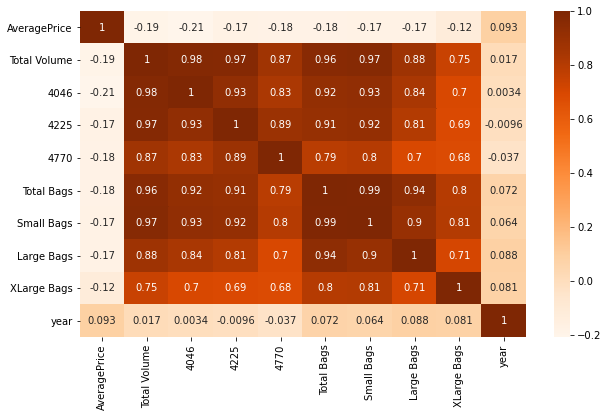

In [24]:
#ploting heatmap.
plt.figure(figsize=(10,6))
sns.heatmap(dfcor,cmap='Oranges',annot=True)

* Light shades are higly correlated
* Year is higly correlated with Xlarge bags
* Xlarge bags is highly negativly correlated with   small bags
* Small bags is highly positively correlated with   average price
* Average price is negatively correlated with year


# Plotting Outliers

In [25]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

<AxesSubplot:>

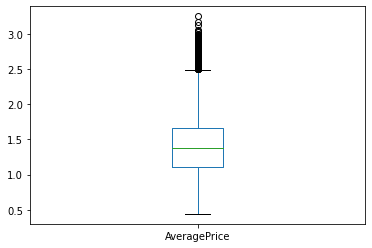

In [26]:
df['AveragePrice'].plot.box()

* Average Price have outside the viscous so we can   find outliers here.

<AxesSubplot:>

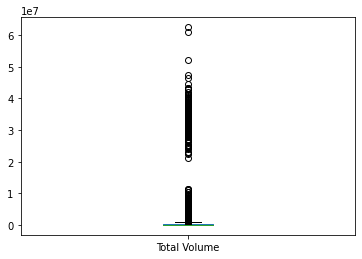

In [27]:
df['Total Volume'].plot.box()

* Total volume have outside the viscous so we can find here outliers easily.

<AxesSubplot:>

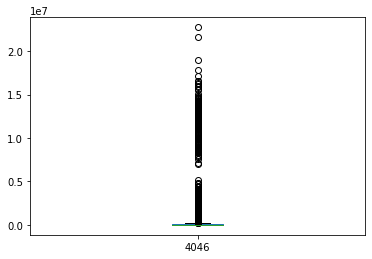

In [28]:
df['4046'].plot.box()

* Here 4046 have no outside the viscous so we can find here outliers easily.

<AxesSubplot:>

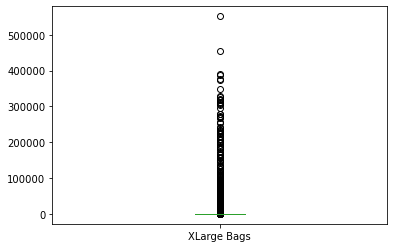

In [29]:
df['XLarge Bags'].plot.box()

* Here Xlarge bags have outside the viscous so we can find outliers here easily.

<AxesSubplot:>

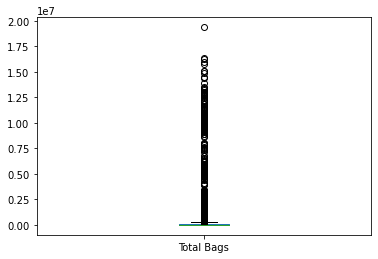

In [30]:
df['Total Bags'].plot.box()

* Here total bags have outside the viscous so we can find outliers here.

<AxesSubplot:>

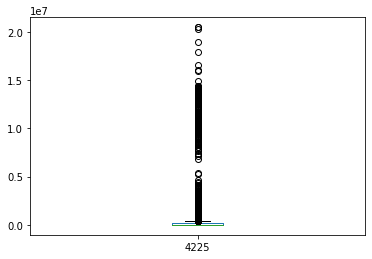

In [31]:
df['4225'].plot.box()

* Here 4225 have outside the viscous so we can find outliers.

<AxesSubplot:>

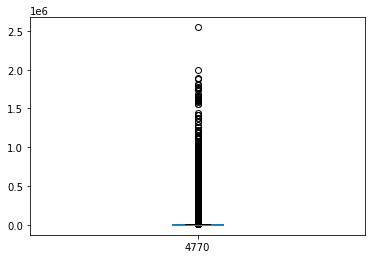

In [32]:
df['4770'].plot.box()

* Here 4770 have outside the viscous so we can find outliers.

<AxesSubplot:>

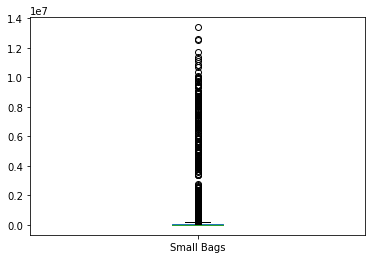

In [33]:
df['Small Bags'].plot.box() 

* Here small bags have outside the viscous so we can find outliers.

In [34]:
df.shape

(18249, 13)

* Dataset containes 18249 rows and 13 columns 

# Checking skewness

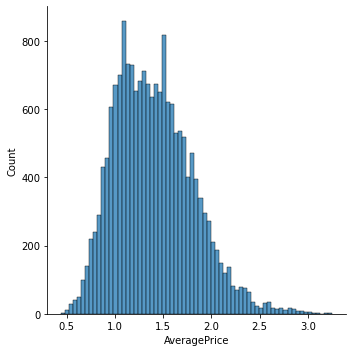

In [35]:
#ploting sns to ckeck skewness.
sns.displot(df['AveragePrice'])

* Data distributed normally in column

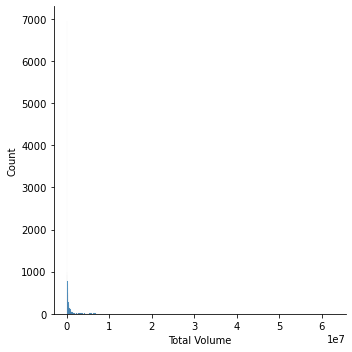

In [36]:
sns.displot(df['Total Volume'])

* Data is not distributed normally in this column.

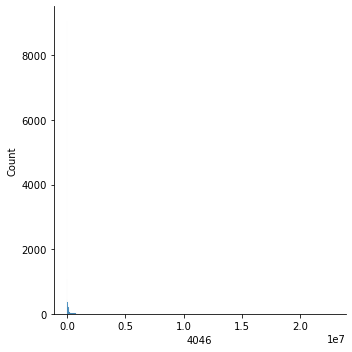

In [37]:
sns.displot(df['4046'])

* Here also data is not distributed normally.

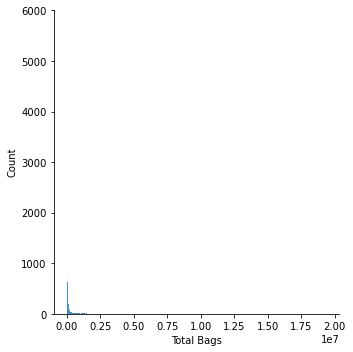

In [38]:
sns.displot(df['Total Bags'])

* Data is not distributed normally in this column

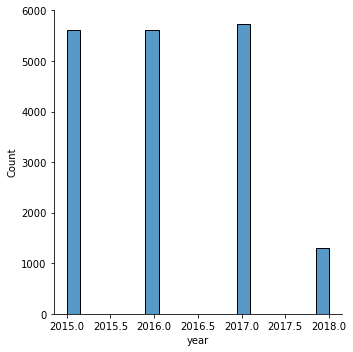

In [39]:
sns.displot(df['year'])

* Data is not distributed normally in this column.

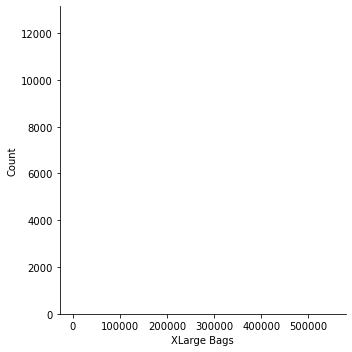

In [40]:
sns.displot(df['XLarge Bags'])

* Data is not distributed normally in this column.

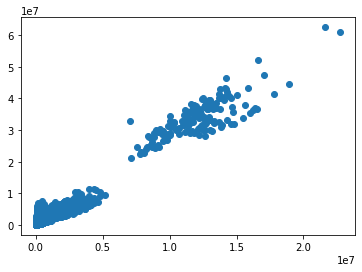

In [41]:
plt.scatter(df['4046'],df['Total Volume'])

* Scattering of 4046 and total volume

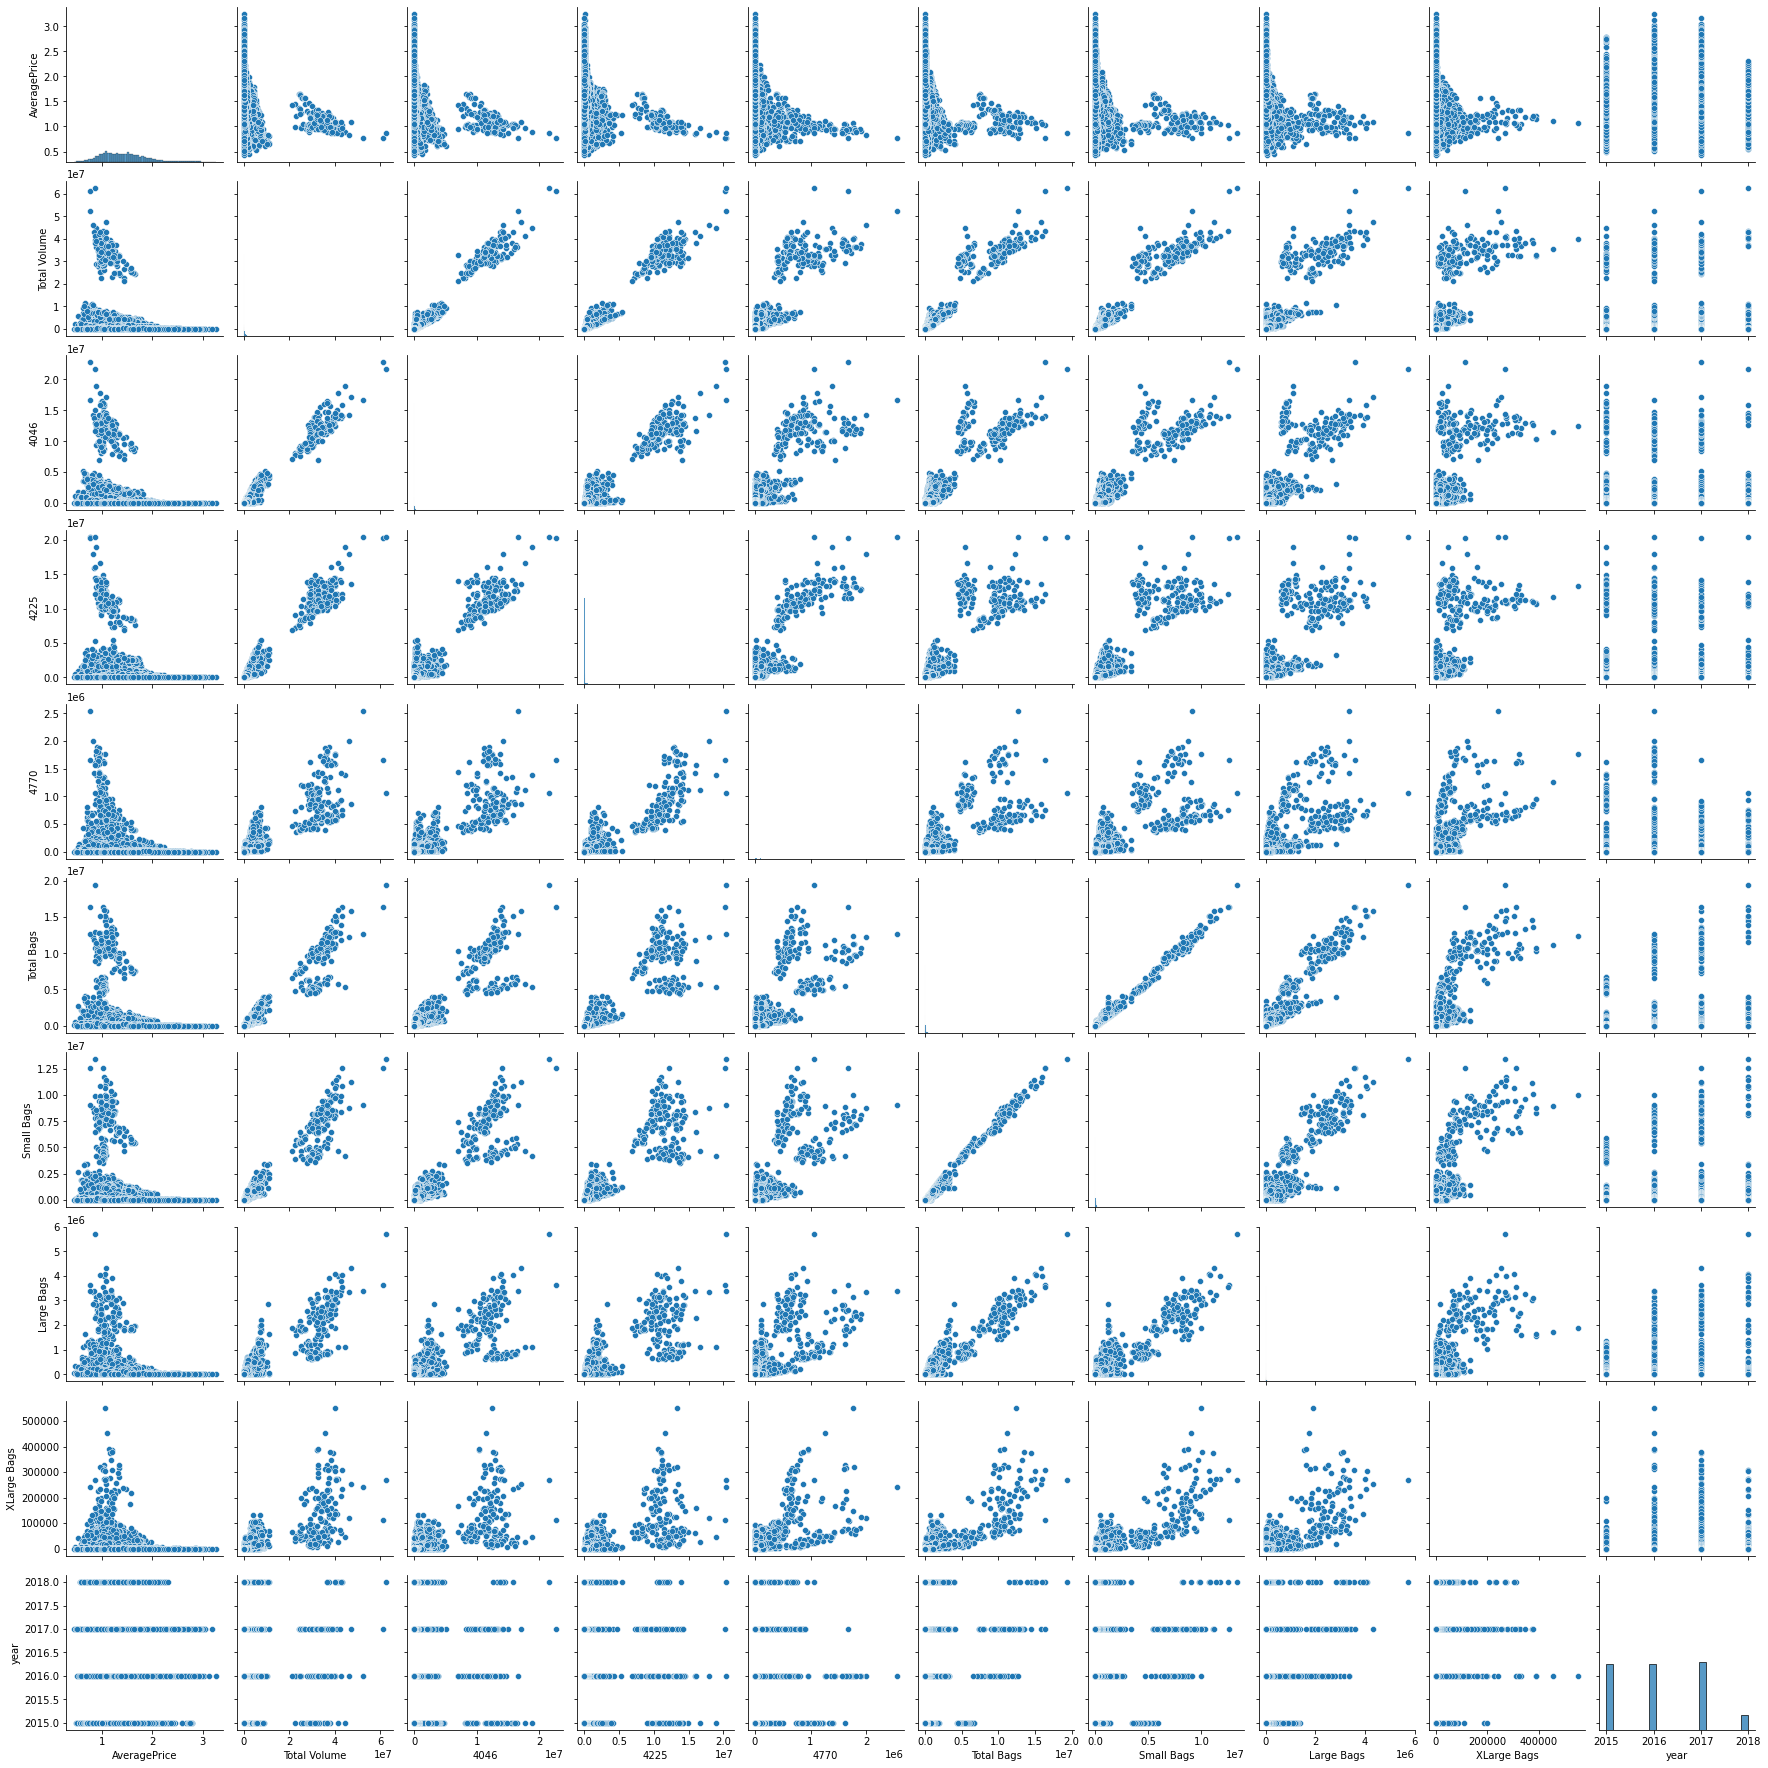

In [42]:
#ploting sns to whole dataset.
sns.pairplot(df)

* Remove the missing values.
* Drop the nagativity correlated columns.
* Remove the outliers.

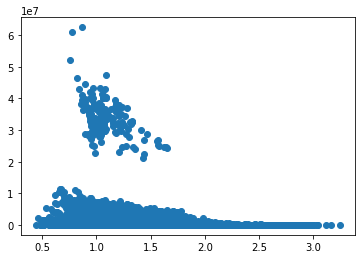

In [43]:
plt.scatter(df['AveragePrice'],df['Total Volume'])
plt.show()

* Here scatter plot of Average price and Total volume

In [44]:
# Droping Total Bags, i feel it doesn't affect to dataset.
df.drop('Total Bags',axis=1,inplace=True)


In [45]:
# Checking dataset head again.
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,5986.26,197.69,0.0,conventional,2015,Albany


In [46]:
df.shape

(18249, 12)

* Dataset contains 18249 rows and 12 columns

In [47]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region'],
      dtype='object')

* There are 13 columns in the dataset

# Encoding Method

In [48]:
# changing type data type into intiger by LabelEncoder.
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['year']=LE.fit_transform(df['year'])

In [49]:
df['year'].unique()

array([0, 1, 2, 3])

In [50]:
# changing type data type into intiger by LabelEncoder.
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['region']=LE.fit_transform(df['region'])

In [51]:
df['region'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53])

In [52]:
# changing type data type into intiger by LabelEncoder.
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['type']=LE.fit_transform(df['type'])

In [53]:
df['type'].unique() 

array([0, 1])

In [54]:
# changing date formate type into intiger by LabelEncoder.
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['Date']=LE.fit_transform(df['Date']) 

In [55]:
df['Date'].unique()

array([ 51,  50,  49,  48,  47,  46,  45,  44,  43,  42,  41,  40,  39,
        38,  37,  36,  35,  34,  33,  32,  31,  30,  29,  28,  27,  26,
        25,  24,  23,  22,  21,  20,  19,  18,  17,  16,  15,  14,  13,
        12,  11,  10,   9,   8,   7,   6,   5,   4,   3,   2,   1,   0,
       103, 102, 101, 100,  99,  98,  97,  96,  95,  94,  93,  92,  91,
        90,  89,  88,  87,  86,  85,  84,  83,  82,  81,  80,  79,  78,
        77,  76,  75,  74,  73,  72,  71,  70,  69,  68,  67,  66,  65,
        64,  63,  62,  61,  60,  59,  58,  57,  56,  55,  54,  53,  52,
       156, 155, 154, 153, 152, 151, 150, 149, 148, 147, 146, 145, 144,
       143, 142, 141, 140, 139, 138, 137, 136, 135, 134, 133, 132, 131,
       130, 129, 128, 127, 126, 125, 124, 123, 122, 121, 120, 119, 118,
       117, 116, 115, 114, 113, 112, 111, 110, 109, 108, 107, 106, 105,
       104, 168, 167, 166, 165, 164, 163, 162, 161, 160, 159, 158, 157])

In [56]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region
0,51,1.33,64236.62,1036.74,54454.85,48.16,8603.62,93.25,0.0,0,0,0
1,50,1.35,54876.98,674.28,44638.81,58.33,9408.07,97.49,0.0,0,0,0
2,49,0.93,118220.22,794.70,109149.67,130.50,8042.21,103.14,0.0,0,0,0
3,48,1.08,78992.15,1132.00,71976.41,72.58,5677.40,133.76,0.0,0,0,0
4,47,1.28,51039.60,941.48,43838.39,75.78,5986.26,197.69,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,161,1.63,17074.83,2046.96,1529.20,0.00,13066.82,431.85,0.0,1,3,53
18245,160,1.71,13888.04,1191.70,3431.50,0.00,8940.04,324.80,0.0,1,3,53
18246,159,1.87,13766.76,1191.92,2452.79,727.94,9351.80,42.31,0.0,1,3,53
18247,158,1.93,16205.22,1527.63,2981.04,727.01,10919.54,50.00,0.0,1,3,53


In [57]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region'],
      dtype='object')

# Removing Outliers

In [58]:
# Removing outliers
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[0.67635986, 0.18868864, 0.22771641, ..., 0.99983562, 1.22128204,
        1.7002522 ],
       [0.69685742, 0.13901962, 0.23042664, ..., 0.99983562, 1.22128204,
        1.7002522 ],
       [0.71735497, 1.18206895, 0.21208462, ..., 0.99983562, 1.22128204,
        1.7002522 ],
       ...,
       [1.53737632, 1.15237477, 0.24233073, ..., 1.00016441, 1.97050371,
        1.70081131],
       [1.51687877, 1.30138182, 0.24162464, ..., 1.00016441, 1.97050371,
        1.70081131],
       [1.49638121, 0.53151208, 0.24125273, ..., 1.00016441, 1.97050371,
        1.70081131]])

In [59]:
thereshold=3
print(np.where(z>3))

(array([  346,   359,   780, ..., 17304, 17402, 17428]), array([3, 3, 8, ..., 1, 1, 1]))


In [60]:
df_new=df[(z<3).all(axis=1)]
df_new

,Date,AveragePrice,Total Volume,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region
0,51,1.33,64236.62,1036.74,54454.85,48.16,8603.62,93.25,0.0,0,0,0
1,50,1.35,54876.98,674.28,44638.81,58.33,9408.07,97.49,0.0,0,0,0
2,49,0.93,118220.22,794.70,109149.67,130.50,8042.21,103.14,0.0,0,0,0
3,48,1.08,78992.15,1132.00,71976.41,72.58,5677.40,133.76,0.0,0,0,0
4,47,1.28,51039.60,941.48,43838.39,75.78,5986.26,197.69,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,161,1.63,17074.83,2046.96,1529.20,0.00,13066.82,431.85,0.0,1,3,53
18245,160,1.71,13888.04,1191.70,3431.50,0.00,8940.04,324.80,0.0,1,3,53
18246,159,1.87,13766.76,1191.92,2452.79,727.94,9351.80,42.31,0.0,1,3,53
18247,158,1.93,16205.22,1527.63,2981.04,727.01,10919.54,50.00,0.0,1,3,53


In [61]:
df.shape

(18249, 12)

In [62]:
df_new.shape

(17651, 12)

# StandardScaler Method

In [63]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaledX=scaler.fit_transform(df)

In [64]:
scaledX

array([[-0.67635986, -0.18868864, -0.22771641, ..., -0.99983562,
        -1.22128204, -1.7002522 ],
       [-0.69685742, -0.13901962, -0.23042664, ..., -0.99983562,
        -1.22128204, -1.7002522 ],
       [-0.71735497, -1.18206895, -0.21208462, ..., -0.99983562,
        -1.22128204, -1.7002522 ],
       ...,
       [ 1.53737632,  1.15237477, -0.24233073, ...,  1.00016441,
         1.97050371,  1.70081131],
       [ 1.51687877,  1.30138182, -0.24162464, ...,  1.00016441,
         1.97050371,  1.70081131],
       [ 1.49638121,  0.53151208, -0.24125273, ...,  1.00016441,
         1.97050371,  1.70081131]])

In [65]:
from sklearn.decomposition import PCA

testpca = PCA()
Y = testpca.fit(scaledX)

In [66]:
Y.explained_variance_ratio_

array([5.15378722e-01, 1.67735704e-01, 1.22516891e-01, 8.15071172e-02,
       3.35950693e-02, 3.17829509e-02, 2.43867383e-02, 1.08660866e-02,
       5.31377014e-03, 3.92446310e-03, 2.99248753e-03, 1.29253634e-11])

In [67]:
var_cumu=np.cumsum(Y.explained_variance_ratio_)*100
var_cumu

array([ 51.53787222,  68.31144261,  80.56313169,  88.71384341,
        92.07335034,  95.25164543,  97.69031926,  98.77692792,
        99.30830494,  99.70075125, 100.        , 100.        ])

In [68]:
k = np.argmax(var_cumu>99)
print('Number of components explaining 99% variance:',k)

Number of components explaining 99% variance: 8


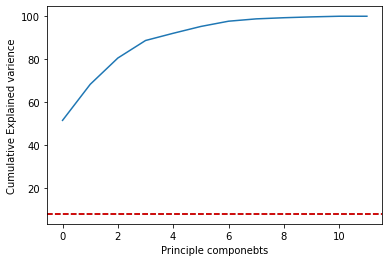

In [69]:
# ploting Cumulative graph.
plt.ylabel('Cumulative Explained varience')
plt.xlabel('Principle componebts')
plt.axhline(y=k, color='k', linestyle="--")
plt.axhline(y=8, color='r', linestyle="--")

plt.plot(var_cumu)
plt.show()

# Data Visualization of Varience

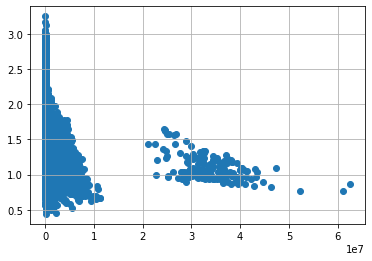

In [70]:
var= 'Total Volume'
plt.scatter(x=df[var], y=df['AveragePrice'])
plt.grid(True)

* Here difference varience of total volume and averageprice

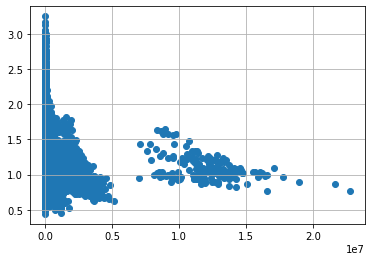

In [71]:
var= '4046'
plt.scatter(x=df[var], y=df['AveragePrice'])
plt.grid(True)

* Here difference varience of 4046 and aveargeprice

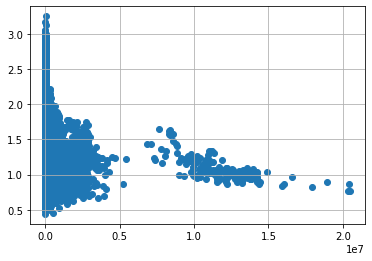

In [72]:
var='4225'
plt.scatter(x=df[var], y= df['AveragePrice'])
plt.grid(True)

* Here difference varience of 4225 and averagePrice

# Missing Value 

In [73]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

# Checking Skewness

In [74]:
df.skew()

Date             0.000117
AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
year             0.215339
region           0.000030
dtype: float64

# Model Engineering

In [75]:
x_train=df.drop('AveragePrice',axis=1)
y_train=df['AveragePrice']

In [76]:
x_train.head()

,Date,Total Volume,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region
0,51,64236.62,1036.74,54454.85,48.16,8603.62,93.25,0.0,0,0,0
1,50,54876.98,674.28,44638.81,58.33,9408.07,97.49,0.0,0,0,0
2,49,118220.22,794.70,109149.67,130.50,8042.21,103.14,0.0,0,0,0
3,48,78992.15,1132.00,71976.41,72.58,5677.40,133.76,0.0,0,0,0
4,47,51039.60,941.48,43838.39,75.78,5986.26,197.69,0.0,0,0,0


In [77]:
y_train.head()

0    1.33
1    1.35
2    0.93
3    1.08
4    1.28
Name: AveragePrice, dtype: float64

In [78]:
x_train.shape

(18249, 11)

Here contains 18249 rows and 11 columns

In [79]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

# Regressor Methods

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [81]:
x=df.drop(['AveragePrice'],axis=1)
y=df['AveragePrice']
x_train, x_test, y_train, y_test=train_test_split(x,y, random_state=50, test_size=0.2)

In [82]:
from sklearn.metrics import mean_squared_error
for i in range(200):
    x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=50)
    from sklearn.tree import DecisionTreeRegressor
    lm=DecisionTreeRegressor()
    lm.fit(x_train,y_train)
    y_pred=lm.predict(x_test)
    mse=mean_squared_error(y_test,y_pred)
    rmse=np.sqrt(mse)
    print(rmse)

0.1800969297616954
0.1801741167003938
0.17995052592538294
0.17994573002276174
0.1804731225008463
0.17989304280409255
0.1812129603154845
0.18081580728571148
0.17937708043755582
0.17992014971640224
0.17959284239940046
0.18341300054010154
0.18077890833454585
0.17902008764611282
0.18012818875334766
0.18197884868814565
0.17988078243773278
0.1797514265380549
0.1806477689825041
0.18101804950494674
0.18141158833867707
0.18044389709823938
0.17979051737226381
0.17728075404122315
0.17902980543160044
0.1827399529685802
0.1808315647073833
0.18003911294988326
0.18121794945721975
0.18102251430397132
0.17963875470449248
0.18009829888223258
0.18257241010488645
0.17798322223530022
0.17911410612706813
0.1825981439987297
0.18250449422126266
0.18311183797198763
0.17797083030192382
0.1822768479952089
0.18118173726346765
0.1799580620855566
0.18039522819676906
0.1785320661117688
0.1823284707139198
0.18317227462632227
0.18216483578687812
0.1789773078139482
0.1817740581578628
0.18114695464755182
0.1786128437296

In [83]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor()
regressor.fit(x_train,y_train)

DecisionTreeRegressor()

In [84]:
y_pred=regressor.predict(x_test)

In [85]:
y_pred

array([1.15, 1.26, 1.58, ..., 0.81, 1.18, 0.64])

In [86]:
dt_accuracy= round(regressor.score(x_train, y_train)*100,2)
dt_accuracy

100.0

* The test accuracy of decision tree regressor is 100

In [87]:
from sklearn.linear_model import LinearRegression
regressor= LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [88]:
y_pred= regressor.predict(x_test)
y_pred

array([1.08861738, 1.14620192, 1.58777565, ..., 1.14255114, 1.13446358,
       1.11216527])

In [89]:
lr_accuracy= round(regressor.score(x_train,y_train)*100,2)
lr_accuracy

43.55

* The test accuracy of LogisticRegression is 43.55

In [90]:
from sklearn.ensemble import RandomForestRegressor
regressor= RandomForestRegressor()
regressor.fit(x_train, y_train)

RandomForestRegressor()

In [91]:
y_pred= regressor.predict(x_test)
y_pred

array([1.2348, 1.2108, 1.717 , ..., 0.8226, 1.2452, 0.6262])

In [92]:
rf_accuracy= round(regressor.score(x_train,y_train)*100,2)
rf_accuracy

98.65

* The test accuracy of RandomForestRegressor is 98.65

# Cross Value Correlation

In [93]:
from sklearn.model_selection import cross_val_score

In [94]:
from sklearn.tree import DecisionTreeRegressor
regressor= DecisionTreeRegressor()
print(cross_val_score(regressor,x,y,cv=5).mean())

-0.08108196506572263


In [95]:
from sklearn.ensemble import RandomForestRegressor
regressor= RandomForestRegressor()
print(cross_val_score(regressor,x,y,cv=5).mean())

0.4146844374315486


In [96]:
from sklearn.linear_model import LinearRegression
regressor= LinearRegression()
print(cross_val_score(regressor,x,y,cv=5).mean())

-10.309085657488726


# Hyperparameter Tunning

In [97]:
from sklearn.model_selection import GridSearchCV

In [98]:
parameter= {'max_depth':[1,3,5,7,9,11,12],
            'criterion':['mse','friedman_mse']}

In [99]:
GCV = GridSearchCV(DecisionTreeRegressor(),parameter,cv=5)

In [100]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'friedman_mse'],
                         'max_depth': [1, 3, 5, 7, 9, 11, 12]})

In [101]:
GCV.best_params_

{'criterion': 'mse', 'max_depth': 12}

# Evaluate the Model

In [102]:
#DecisionTreeRegressor test.
from sklearn.tree import DecisionTreeRegressor
regressor= DecisionTreeRegressor()
regressor.fit(x_train,y_train)
Final_mod= DecisionTreeRegressor()
Final_mod.fit(x_train, y_train)
pred= Final_mod.predict(x_test)
print(regressor.score(x_test,y_test)*100)

81.31582799286656


In [103]:
#LinearRegression test.
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)
Final_mod= LinearRegression()
Final_mod.fit(x_train,y_train)
pred= Final_mod.predict(x_test)
print(regressor.score(x_test,y_test)*100)

45.11413601905755


In [104]:
#RandomForestRegressor test.
from sklearn.ensemble import RandomForestRegressor
regressor= RandomForestRegressor()
regressor.fit(x_train,y_train)
Final_mod= RandomForestRegressor()
Final_mod.fit(x_train,y_train)
pred= Final_mod.predict(x_test)
print(regressor.score(x_test,y_test)*100)

91.56463426102253


# Save The Model

In [105]:
#Saving MOdel.
import joblib
joblib.dump(Final_mod,'Avacodo Project.csv')

['Avacodo Project.csv']

Saved the model

# Prediction Method

In [106]:
# Final model.
Final_mod= DecisionTreeRegressor()
Final_mod.fit(x_train,y_train)
pred= Final_mod.predict(x_test)
preds= regressor.predict(x_test)
print(preds[:36])
print(y_test[:36].values)

[1.1877 1.2152 1.7384 1.7331 1.9839 1.6256 1.6468 1.0776 1.6052 1.5636
 1.15   0.8763 1.9361 1.1463 1.6489 0.9163 2.001  1.8109 1.4755 1.5853
 1.1104 1.8989 1.8338 1.7183 1.0028 1.5432 0.8878 1.3246 1.0299 2.083
 1.3204 1.0964 1.0392 1.034  1.4073 1.9446]
[1.21 1.17 1.61 2.01 2.02 1.76 1.61 1.03 1.63 1.53 0.98 0.86 2.1  0.88
 1.74 0.9  1.88 1.75 1.63 1.52 1.08 2.06 1.94 1.76 0.97 1.43 0.88 1.44
 0.8  1.87 1.33 1.08 1.04 1.1  1.53 1.79]


In [107]:
# LinearRegression
from sklearn.linear_model import LinearRegression
regressor= LinearRegression()
regressor.fit(x_train,y_train)
Final_mod= LinearRegression()
Final_mod.fit(x_train,y_train)
pred= Final_mod.predict(x_test)
preds= regressor.predict(x_test)
print(preds[:36])
print(y_test[:36].values)

[1.08861738 1.14620192 1.58777565 1.58469686 1.58348482 1.71526452
 1.66955834 1.22753262 1.72617438 1.27547023 1.26587659 1.05227429
 1.67542508 1.18175762 1.24357573 1.0537274  1.72607797 1.62312926
 1.58528193 1.69130019 1.20541138 1.82065781 1.66024084 1.25407738
 1.15450598 1.6142315  1.08937014 1.09223682 1.12150636 1.67298661
 1.18527466 1.15353495 1.0975474  1.02478704 1.2503751  1.81478547]
[1.21 1.17 1.61 2.01 2.02 1.76 1.61 1.03 1.63 1.53 0.98 0.86 2.1  0.88
 1.74 0.9  1.88 1.75 1.63 1.52 1.08 2.06 1.94 1.76 0.97 1.43 0.88 1.44
 0.8  1.87 1.33 1.08 1.04 1.1  1.53 1.79]


In [108]:
#RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
regressor= RandomForestRegressor()
regressor.fit(x_train,y_train)
Final_mod= RandomForestRegressor()
Final_mod.fit(x_train,y_train)
pred= Final_mod.predict(x_train)
preds= regressor.predict(x_test)
print(preds[:36])
print(y_test[:36].values)

[1.1958 1.2569 1.7435 1.736  1.9697 1.6316 1.6479 1.0703 1.586  1.5051
 1.1316 0.8789 1.9292 1.1319 1.6349 0.9094 2.023  1.817  1.4437 1.6184
 1.1162 1.9555 1.8551 1.7046 1.0231 1.6096 0.8818 1.3159 1.0296 2.0637
 1.2957 1.0865 1.0413 1.0316 1.4105 2.0066]
[1.21 1.17 1.61 2.01 2.02 1.76 1.61 1.03 1.63 1.53 0.98 0.86 2.1  0.88
 1.74 0.9  1.88 1.75 1.63 1.52 1.08 2.06 1.94 1.76 0.97 1.43 0.88 1.44
 0.8  1.87 1.33 1.08 1.04 1.1  1.53 1.79]


* The train and test data is balanced most classification method hit the 91% accuracy with the dataset.